# Assignment 1

Dear students, you have successfully cloned the repo. Great! :)

This assignment includes a warm-up task "Image_I/O" and the task "Color spaces and morphological operators" from the first lecture.

## Task 0 - Image-I/O

There are several python libraries for reading and displaying images. I recommend scikit-image. Execute the next cell and install missing libraries like scikit-image. 

In [1]:
# imports
%matplotlib inline
from skimage import io, data, color
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

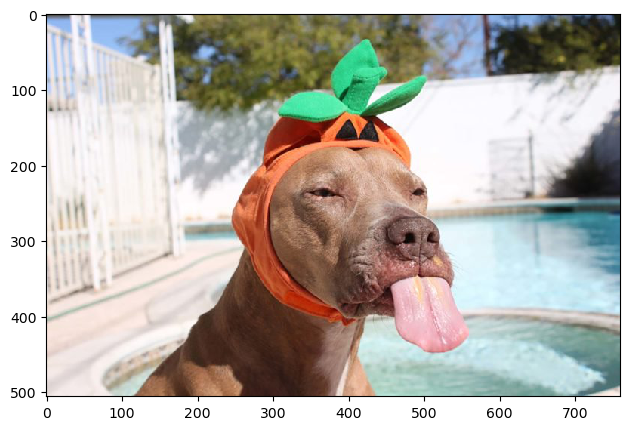

In [2]:
image = io.imread('images/dog.jpg')
io.imshow(image)

By the way, there are many test images in skimage.data that you can use for your tasks. Execute the next two cells. 

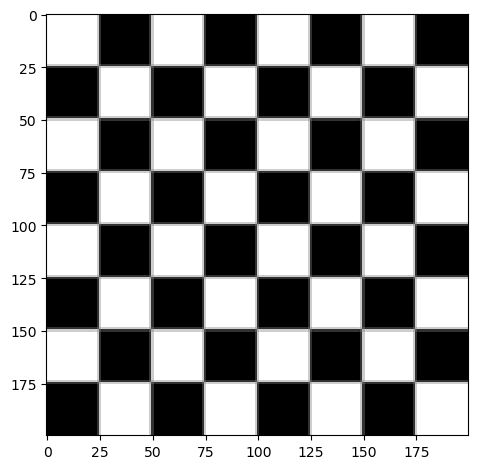

In [3]:
io.imshow(data.checkerboard())

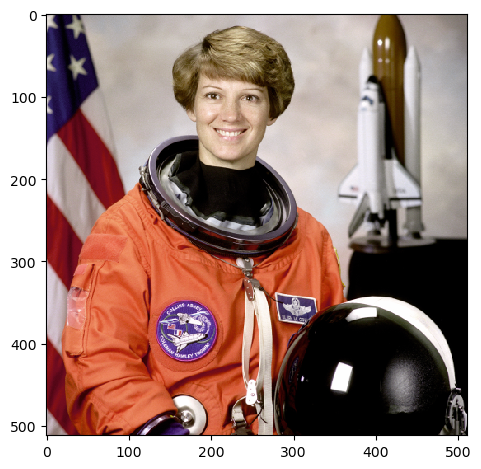

In [4]:
io.imshow(data.astronaut())

Add a line of code to the next cell to display 440 <= x <= 540 and 250 <= y <= 390 for the dog image!

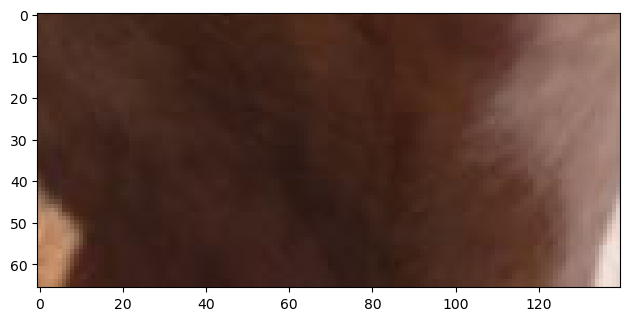

In [5]:
dog_image = io.imread('images/dog.jpg')
dog_image_cropped = dog_image[440:540, 250:390]

io.imshow(dog_image_cropped)

Now convert the color image to a grayscale image and display it!

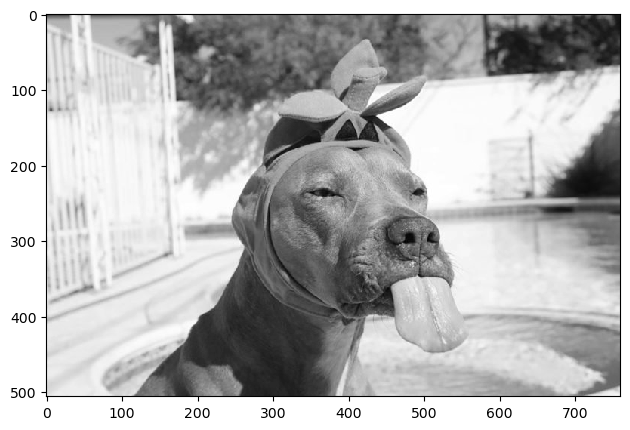

In [6]:
from skimage.color import rgb2gray

dog_image_grayscale = rgb2gray(dog_image)

io.imshow(dog_image_grayscale)

There are other color spaces. For example, HSV will be used in the lecture. Convert your image to HSV and display the H-channel.

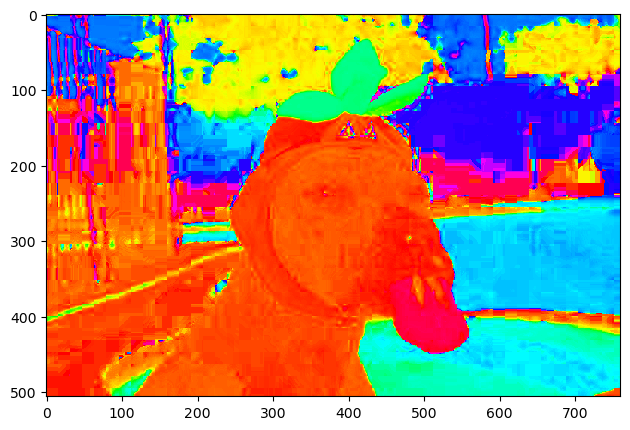

In [7]:
from skimage.color import rgb2hsv

dog_image_hsv = rgb2hsv(dog_image)
dog_image_hchannel = dog_image_hsv[:, :, 0]


io.imshow(dog_image_hchannel, cmap='hsv')

Did you know that HSV now allows creating robust (i.e. lighting independent) color histograms? Create one with Matplotlib!

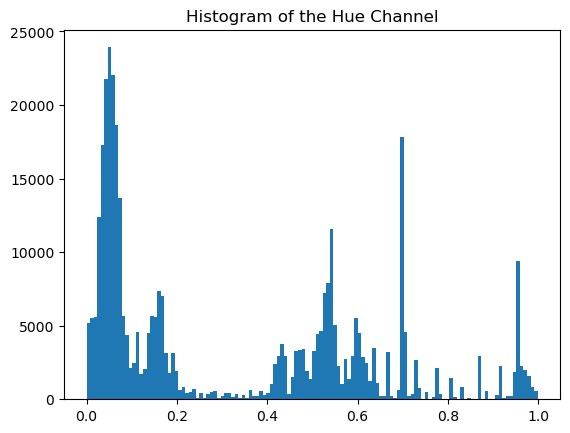

In [8]:
plt.hist(dog_image_hchannel.ravel(), 128);
plt.title('Histogram of the Hue Channel')
plt.show()

## Task 1 - Color Spaces and Morphological Operators

### Task 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put an example image in `/images`.

* Define the „positive“ subspace P in the RGB cube
* Iterate over all pixels in I and check if in P or ~P
* Write result to new image
* Play around with size and shape of P and display binary image (**RESULT**)

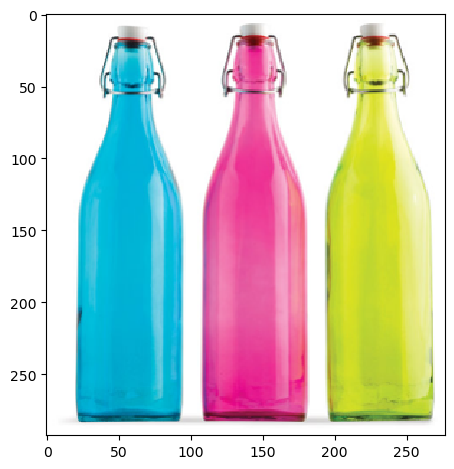

In [9]:
image = io.imread('images/bottles.png')
io.imshow(image)

In [52]:
def binarization(red_range: list[int, int], green_range: list[int, int], blue_range:list[int, int]) -> np.ndarray:
    #Color ranges, Inclusive

    color_range = np.stack((red_range, green_range, blue_range), axis = 1)
    image_filter_color = np.where((image >= color_range[0]) & (image <= color_range[1]), 1, 0)
    image_filter = np.prod(image_filter_color, axis=2)
    #draw image filter
    print('Image Filter')
    io.imshow(image_filter);
    io.show()
    #draw filtered image
    print('Filtered Image')
    io.imshow(image_filter[..., np.newaxis] * image);
    io.show()
    return(image_filter)

Image Filter


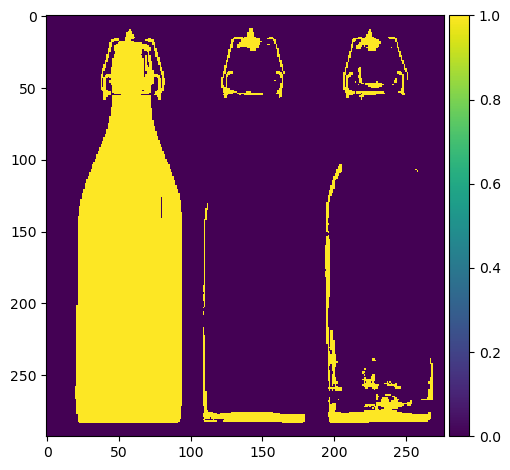

Filtered Image


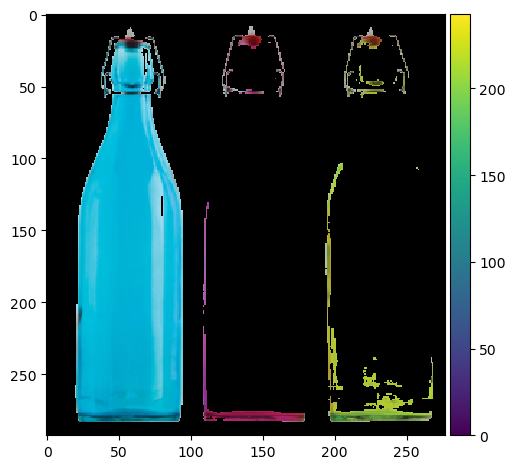

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [138]:
red_range = [0, 180]
green_range = [0, 220]
blue_range = [0, 255]

binarization(red_range, green_range, blue_range)

Image Filter


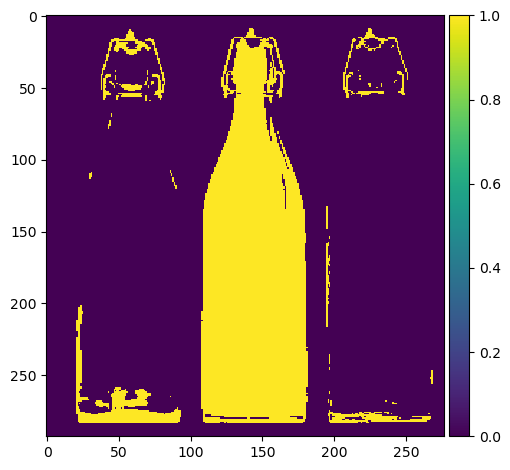

Filtered Image


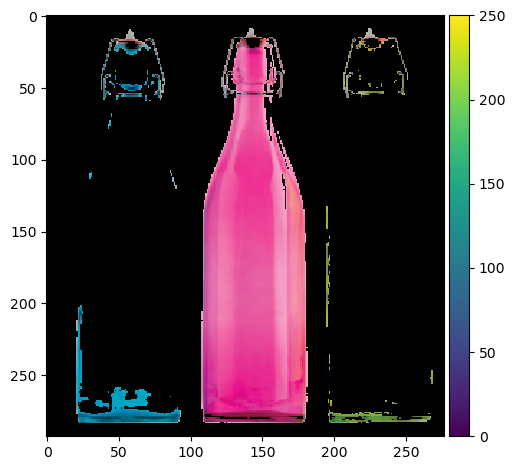

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [104]:
red_range = [0, 255]
green_range = [0, 180]
blue_range = [50, 200]

binarization(red_range, green_range, blue_range)

Image Filter


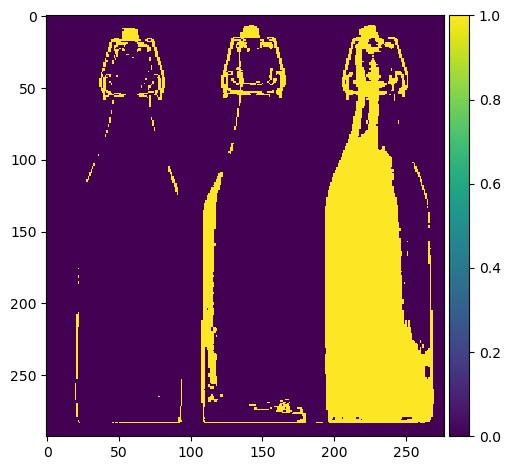

Filtered Image


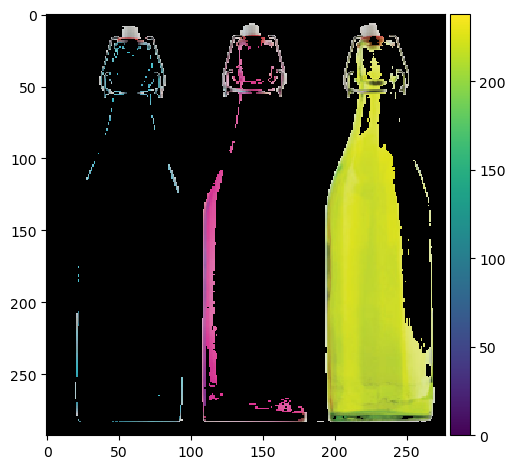

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [125]:
red_range = [50, 225]
green_range = [50, 255]
blue_range = [20, 210]

binarization(red_range, green_range, blue_range)

### Task 1.2

* Take your binary color detection image
* Erase noise with an erosion operation
* Dilate once to get original size of object
* Find connected components with the two-pass algorithm
* Extract the bounding box on the fly
* Draw the bounding box on original image (**RESULT**)

In [127]:
from skimage.morphology import binary_erosion, binary_dilation

def binary_color_detection(red_range: list[int, int], green_range: list[int, int], blue_range:list[int, int]) -> np.ndarray:
    #Color ranges, Inclusive

    color_range = np.stack((red_range, green_range, blue_range), axis = 1)
    image_filter_color = np.where((image >= color_range[0]) & (image <= color_range[1]), 1, 0)
    image_filter = np.prod(image_filter_color, axis=2)
    
    return(image_filter)

In [128]:
red_range = [0, 180]
green_range = [0, 220]
blue_range = [0, 255]

blue_bottle_filter = binary_color_detection(red_range, green_range, blue_range)

/Users/tolga/miniconda3/envs/data4science/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


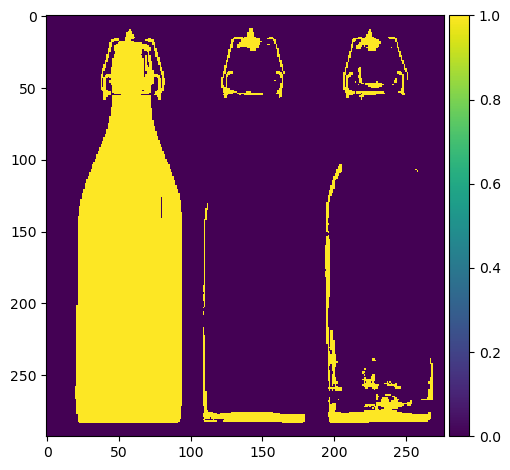

In [131]:
io.imshow(blue_bottle_filter);

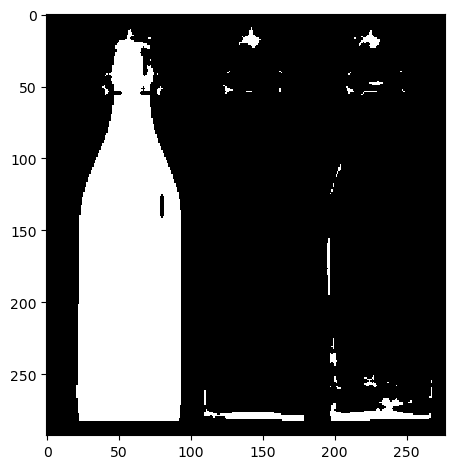

In [151]:
erode = binary_erosion(blue_bottle_filter)
io.imshow(erode)

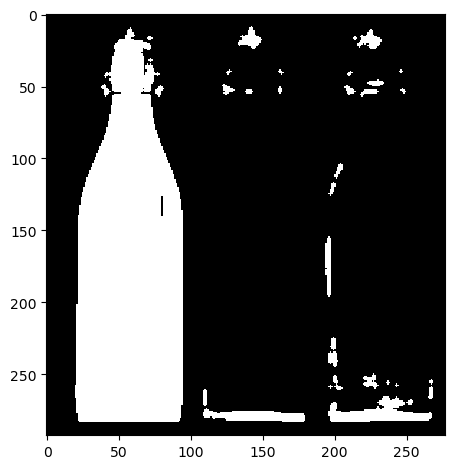

In [152]:
dilate = binary_dilation(erode)
io.imshow(dilate)

In [153]:
from skimage.color import label2rgb
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import expand_labels, watershed

In [154]:
edges = sobel(dilate)

In [160]:
from skimage import measure

In [ ]:
labeled_image, count = measure.label(dilate, return_num = True)

In [169]:
labeled_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

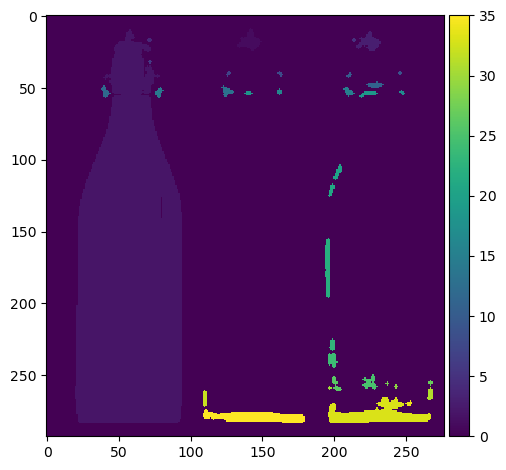

In [170]:
io.imshow(labeled_image)

In [171]:
objects = measure.regionprops(labeled_image)

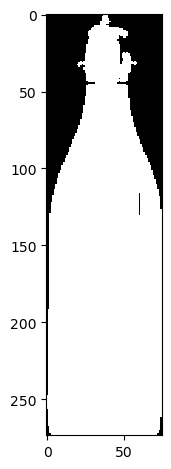

In [178]:
io.imshow(objects[1]['image'])

### Task 1.3

* Use your color detection and connected components algorithm
* Implement simplest tracking algorithm
* Draw history of all previous points on the frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)

In [ ]:
# code here

### Task 1.4 (BONUS)

* Find connected components using a one-pass algorithm in your image from Task 1.2
* Plot the resulting image and compare it to the result of your two-pass implementation (**RESULT**)

In [ ]:
# code here

## Congratz, you made it! :)